EDA - EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#'''
#from google.colab import drive
#drive.mount('/content/drive')
#'''

In [3]:
data = pd.read_csv("dataset.csv")
print(data)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9800\4162320331.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.csv")


              id    spkid          full_name      pdes     name prefix neo  \
0       a0000001  2000001            1 Ceres         1    Ceres    NaN   N   
1       a0000002  2000002           2 Pallas         2   Pallas    NaN   N   
2       a0000003  2000003             3 Juno         3     Juno    NaN   N   
3       a0000004  2000004            4 Vesta         4    Vesta    NaN   N   
4       a0000005  2000005          5 Astraea         5  Astraea    NaN   N   
...          ...      ...                ...       ...      ...    ...  ..   
958519  bPLS6013  3246801         (6013 P-L)  6013 P-L      NaN    NaN   N   
958520  bPLS6331  3246834         (6331 P-L)  6331 P-L      NaN    NaN   N   
958521  bPLS6344  3013075         (6344 P-L)  6344 P-L      NaN    NaN   Y   
958522  bT2S2060  3246457         (2060 T-2)  2060 T-2      NaN    NaN   N   
958523  bT3S2678  3246553         (2678 T-3)  2678 T-3      NaN    NaN   N   

       pha       H  diameter  ...       sigma_i      sigma_om  

In [4]:
null_values = data.isnull().sum()
print(null_values)

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [5]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [7]:
data.tail()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000,7.433000,46.311000,27.383000,1.041200e+00,1.652100e-01,130.970000,726.490000,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,0.000016,0.000056,0.000238,0.000130,2.418900e-08,3.346100e-09,0.000469,0.000016,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,0.000019,0.000057,0.000090,0.000053,1.650100e-07,1.101600e-08,0.000283,0.000091,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,0.544880,4.391600,18.988000,10.838000,7.171600e-01,1.016700e-01,38.984000,503.550000,MBA,0.25641
958523,bT3S2678,3246553,(2678 T-3),2678 T-3,NaN,NaN,N,N,18.060,NaN,...,1.102300,0.311700,1.284300,0.473610,1.626700e-01,2.487900e-02,5.523600,106.480000,MBA,0.26980


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [9]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [10]:
data.shape

(958524, 45)

In [11]:
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


In [12]:
data['pha'].value_counts(normalize=True)*100    # PHA - potentially hazardous asteroids

# It takes the total count of yes or now and normalises it or gives it as a percentage of yes and no

pha
N    99.779886
Y     0.220114
Name: proportion, dtype: float64

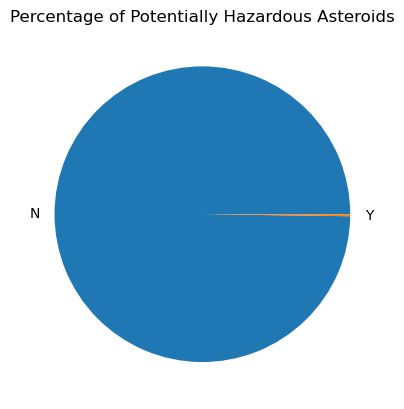

In [13]:
pha_counts = data['pha'].value_counts(normalize=True) * 100

plt.pie(pha_counts, labels=pha_counts.index)
plt.title("Percentage of Potentially Hazardous Asteroids")
plt.show()

In [14]:
data['neo'].value_counts(normalize=True)*100    # NEO - near earth objects

neo
N    97.611422
Y     2.388578
Name: proportion, dtype: float64

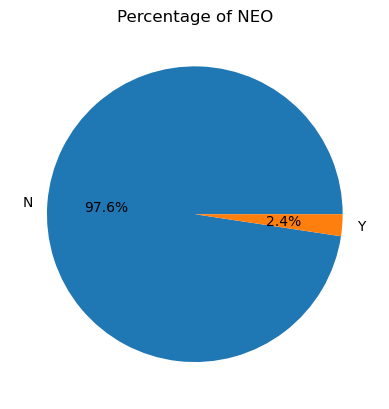

In [15]:
neo_counts = data['neo'].value_counts(normalize=True) * 100

plt.pie(neo_counts, labels=neo_counts.index, autopct="%1.1f%%")
plt.title("Percentage of NEO")
plt.show()

In [16]:
print(data['orbit_id'].unique())
print(data['orbit_id'].nunique())
#Names and counts of unique orbits

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [17]:
print(data['prefix'].unique())
print(data['prefix'].nunique())
# prefixes - to understand the type of asteroid

[nan 'A']
1


In [18]:
# equinox reference
print(data['equinox'].unique())
print(data['equinox'].nunique())

['J2000']
1


In [19]:
# Orbit classification (Name and count)
print(data['class'].unique())
print(data['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


In [20]:
data1 = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

#The following columns do not give us fruitful info and so are dropped
#id, spkid, pdes, name are unique to every asteroid
#(Full name is divided as pdes and name)



---



DATA WRANGLING

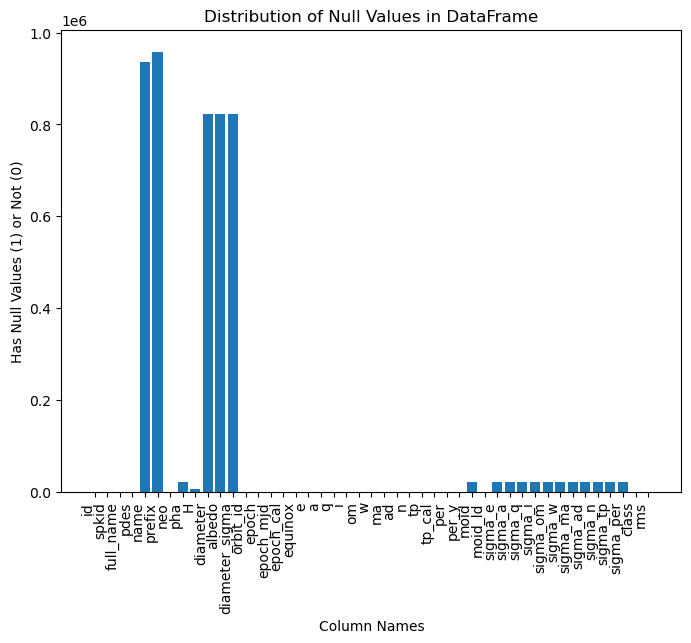

In [21]:
null_flags = data.isnull().sum()
plt.figure(figsize=(8, 6))
plt.bar(null_flags.index, null_flags.values)
plt.xlabel("Column Names")
plt.ylabel("Has Null Values (1) or Not (0)")
plt.title("Distribution of Null Values in DataFrame")
plt.xticks(rotation=90, ha="right")
plt.show()

#To get an idea of the columns that have a lot of null values

In [22]:
missing_values = data1[['diameter', 'albedo', 'diameter_sigma']].isnull().sum()
print(missing_values)
# This leaves us to about only 130000 rows with values in them
# This is only about 14% of the dataset, and thus we drop these columns

diameter          822315
albedo            823421
diameter_sigma    822443
dtype: int64


In [23]:
asteroid_df = data1[data1['pha'].notna()]
asteroid_df = asteroid_df.drop(['diameter', 'albedo', 'diameter_sigma'], axis= 'columns')
# In the dataset, "pha" is the most important column
# (Since it tells us if an asteroid is poentially hazardous or not)

In [24]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

null_count = asteroid_df.isnull().sum()
print(null_count)


Number of rows: 958524
Number of columns: 45
spkid           0
full_name       0
neo             4
pha             0
H            6262
orbit_id        0
epoch           0
epoch_mjd       0
epoch_cal       0
e               0
a               0
q               0
i               0
om              0
w               0
ma              1
ad              4
n               0
tp              0
tp_cal          0
per             4
per_y           1
moid            0
moid_ld         0
sigma_e         1
sigma_a         1
sigma_q         1
sigma_i         1
sigma_om        1
sigma_w         1
sigma_ma        1
sigma_ad        5
sigma_n         1
sigma_tp        1
sigma_per       5
class           0
rms             1
dtype: int64


In [25]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]
asteroid_df = asteroid_df[asteroid_df['sigma_ad'].notna()]
asteroid_df = asteroid_df[asteroid_df['ma'].notna()]
print(asteroid_df)
# Removing rows that have a lot of null values
# Deleting rows with many missing values is better than filling them inaccurately.

          spkid          full_name neo pha       H orbit_id      epoch  \
0       2000001            1 Ceres   N   N   3.400   JPL 47  2458600.5   
1       2000002           2 Pallas   N   N   4.200   JPL 37  2459000.5   
2       2000003             3 Juno   N   N   5.330  JPL 112  2459000.5   
3       2000004            4 Vesta   N   N   3.000   JPL 35  2458600.5   
4       2000005          5 Astraea   N   N   6.900  JPL 114  2459000.5   
...         ...                ...  ..  ..     ...      ...        ...   
958519  3246801         (6013 P-L)   N   N  17.135    JPL 5  2437203.5   
958520  3246834         (6331 P-L)   N   N  18.500        8  2459000.5   
958521  3013075         (6344 P-L)   Y   Y  20.400       17  2459000.5   
958522  3246457         (2060 T-2)   N   N  18.071    JPL 3  2441956.5   
958523  3246553         (2678 T-3)   N   N  18.060    JPL 3  2443429.5   

        epoch_mjd   epoch_cal         e  ...       sigma_i      sigma_om  \
0           58600  20190427.0  0.07

In [26]:
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['class'] = asteroid_df['class'].astype('category')
# Converting these columns into category datatype (y or n) for simplicity

In [27]:
asteroid_df['neo'].value_counts(normalize=True)*100

neo
N    97.545625
Y     2.454375
Name: proportion, dtype: float64

In [28]:
asteroid_df['pha'].value_counts(normalize=True)*100

pha
N    99.778406
Y     0.221594
Name: proportion, dtype: float64

In [29]:
# out of the neo's, how many are pha?
neo_which_are_pha = asteroid_df[asteroid_df['neo']=='Y']['pha']
percentages = neo_which_are_pha.value_counts(normalize=True)*100
print(percentages)

pha
N    90.971464
Y     9.028536
Name: proportion, dtype: float64


In [30]:
# out of the pha's, how many are neo?
pha_which_are_neo = asteroid_df[asteroid_df['pha']=='Y']['neo']
percentages = pha_which_are_neo.value_counts(normalize=True)*100
print(percentages)

#The output tells us that all potentially hazardous asteroids are also near earth objects

neo
Y    100.0
N      0.0
Name: proportion, dtype: float64


In [31]:
# Orbit types distribution
asteroid_df['class'].value_counts(normalize=True)*100

class
MBA    89.308028
OMB     2.914189
IMB     2.113189
MCA     1.908005
APO     1.360455
AMO     0.906112
TJN     0.871146
TNO     0.371004
ATE     0.185448
CEN     0.053951
AST     0.006114
IEO     0.002360
Name: proportion, dtype: float64

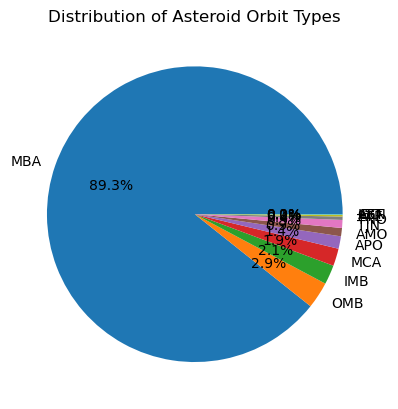

In [32]:
class_counts = asteroid_df['class'].value_counts(normalize=True) * 100
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Asteroid Orbit Types")
plt.show()

In [33]:
# how many orbit ids exist?
asteroid_df['orbit_id'].nunique()

525

In [34]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932335 entries, 0 to 958523
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   spkid      932335 non-null  int64   
 1   full_name  932335 non-null  object  
 2   neo        932335 non-null  category
 3   pha        932335 non-null  category
 4   H          932335 non-null  float64 
 5   orbit_id   932335 non-null  object  
 6   epoch      932335 non-null  float64 
 7   epoch_mjd  932335 non-null  int64   
 8   epoch_cal  932335 non-null  float64 
 9   e          932335 non-null  float64 
 10  a          932335 non-null  float64 
 11  q          932335 non-null  float64 
 12  i          932335 non-null  float64 
 13  om         932335 non-null  float64 
 14  w          932335 non-null  float64 
 15  ma         932335 non-null  float64 
 16  ad         932335 non-null  float64 
 17  n          932335 non-null  float64 
 18  tp         932335 non-null  float64 
 19  tp_cal 

DATA PREPROCESSING

In [35]:
unique_orbits = asteroid_df['orbit_id'].unique()
print("The number of unique orbits that exst are : ",len(unique_orbits))

orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x<10].index.to_list()
print(orbits)
len(orbits)

# the loc lambda x<10 filters the series to include only the rows where the count is less than 10
# the index.tolist() to convert the index of the filtered series into a list

The number of unique orbits that exst are :  525
['100', 'JPL 90', '92', 'JPL 92', 'JPL 101', '110', 'JPL 121', 'JPL 89', 'JPL 114', 'JPL 104', '111', 'JPL 124', '78', '107', '96', 'JPL 112', 'JPL 85', '79', '84', '105', 'JPL 125', 'JPL 115', '93', '120', 'JPL 88', '97', 'JPL 126', 'JPL 119', '166', '147', '149', '106', '115', 'JPL 120', '128', 'JPL 111', '125', 'JPL 123', '137', 'JPL 233', '124', 'JPL 130', '90', '122', '161', 'JPL 145', 'JPL 143', '118', 'JPL 116', '116', 'JPL 93', '108', 'JPL 122', 'JPL 95', 'JPL 195', '146', 'JPL 134', 'JPL 127', '113', '127', '109', '221', 'JPL 197', '135', 'JPL 148', 'JPL 155', '98', 'JPL 109', 'JPL 161', 'JPL 118', '185', '121', '102', 'JPL 144', '153', 'JPL 147', '134', 'JPL 142', '114', '141', '133', '190', '129', 'JPL 128', '131', 'JPL 199', 'JPL 157', '117', '151', '212', '178', '142', 'JPL 263', 'JPL 132', '119', 'JPL 136', '136', 'JPL 182', '173', 'JPL 129', '123', 'JPL 160', '112', 'JPL 158', '165', 'JPL 282', '280', '187', 'JPL 139', '14

331

In [36]:
# the above output means that there are 331 orbit ids that occour less than 10 times

#These are to be considered as outliers and will be used to investigate on rare cases and anomalies

In [37]:
asteroid_df = asteroid_df.reset_index(drop=True)

In [38]:
# Creating a subset of only numerical columns to scale
subset_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]
# ml algos might need values of same datatype
subset_df.shape

(932335, 31)

In [39]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=subset_df.columns)
#We are matching column names from the old df to the new one
asteroid_df = pd.concat([asteroid_df[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']],scaled_df], axis=1)
scaled_df.head()
# Scaling and preprocessing using module sklearn library

# scaler -> transform features by scaling then to a given range where minmax puts it between 0 to 1

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,...,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,...,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,...,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,...,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194


In [40]:
asteroid_df1 = pd.get_dummies(asteroid_df, columns=['neo', 'class', 'orbit_id'])
asteroid_df1.shape
asteroid_df1.head()
#Performing ONE HOT ENCODING on neo, class, and orbit_id columns
# converts categorical data into numerical format

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,...,False,False,False,False,False,False,False,False,False,False
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,...,False,False,False,False,False,False,False,False,False,False
2,2000003,3 Juno,N,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,...,False,False,False,False,False,False,False,False,False,False
3,2000004,4 Vesta,N,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,...,False,False,False,False,False,False,False,False,False,False
4,2000005,5 Astraea,N,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,...,False,False,False,False,False,False,False,False,False,False




---



# **ML MODEL DEVELOPING**



---



In [41]:
from sklearn.model_selection import train_test_split
X = asteroid_df1.drop(['spkid', 'full_name', 'pha'], axis = 1)    #dropping these since we dont need them, and pha will be used as a label alone
Y = asteroid_df1.iloc[:]['pha']
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.30, random_state=1501)
# the last line specifies that 30% of the data will be used for testing purpose and the random state ensures that the data for tesitng is selected at random and that is set to any random arbitrary value, like 1501 here

In [42]:
print("Before OverSampling, counts of label 'N': {}".format(sum(y_train == 'N')))
print("Before OverSampling, counts of label 'Y': {} \n".format(sum(y_train == 'Y')))
# these lines are to get the count of the labels N and Y before performing data oversampling
# these labels are used from the training dataset y_train

Before OverSampling, counts of label 'N': 651221
Before OverSampling, counts of label 'Y': 1413 



In [43]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.to_numpy())

print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))


After OverSampling, counts of label 'N': 651221
After OverSampling, counts of label 'Y': 651221


In [44]:
# to solve class imbalance and do oversampling, lets use SMOTE
from imblearn.over_sampling import SMOTE      #imblearn is a lib designed specifically for solving imbalance in datasets
sm = SMOTE(random_state = 2)      #we're creating an instance of the smote class and calling it sm.the random seed here does the same job as it did previously, by just ensuring reproducibility
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.to_numpy()) 


#fitting it to the algorithm. the y_trian.ravel converts it from a 2d array to a 1d array
# here, we're converting only the y_train data into 1d since its only dimension shd be target variable

In [45]:
print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))

After OverSampling, counts of label 'N': 651221
After OverSampling, counts of label 'Y': 651221


In [46]:
from sklearn import metrics
def metricCalculation(y_test, pred):

    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    print('Precision metric:',round(precision_metric, 2))
    print('Recall Metric:',round(recall_metric, 2))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))
# here, we cant call the function because the pred differs from ml model to ml model

 LOGISTIC REGRESSION

In [47]:
# here, we'll compare the various metrics with eachother and come up with an accuracy estimate
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter= 100)
logisticRegr.fit(x_train_res, y_train_res)
lr_pred = logisticRegr.predict(x_test)

In [48]:
metricCalculation(y_test, lr_pred)
# calling the function based on the logistic regression

Precision metric: 0.61
Recall Metric: 0.97
Accuracy Metric: 0.9922
F1 score: 0.68


In [49]:
print(metrics.confusion_matrix(y_test, lr_pred))

[[276891   2157]
 [    30    623]]


In [50]:
# the above code shows that there is a high false positive value, which says that logistic regression isnt strong enough to analyse the dataset properly



---



RANDOM FOREST

In [51]:
# to find the best value for the number of trees in the forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = [100, 150]  # Experiment with different values
cv_scores = []

for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=1551)
    scores = cross_val_score(rf, x_train_res, y_train_res, cv=2, scoring='accuracy')     #cv=5 specifies that we're using 5 folds here
    cv_scores.append(scores.mean())

# Find the best number of trees
best_num_trees = num_trees[cv_scores.index(max(cv_scores))]
print("Best number of trees:", best_num_trees)

Best number of trees: 150


In [52]:
# random forest is best to remove overfitting, and is better than logistic regression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, random_state = 1551)
# the n_estimators specifies the number of trees, which we got after using cross validation
rf.fit(x_train_res, y_train_res)
rf_pred = rf.predict(x_test)
print(rf_pred)

['N' 'N' 'N' ... 'N' 'N' 'N']


In [53]:
metricCalculation(y_test, rf_pred)

Precision metric: 0.98
Recall Metric: 1.0
Accuracy Metric: 0.9999
F1 score: 0.98


In [54]:
print(metrics.confusion_matrix(y_test, rf_pred))
# this shows that random forest has a better score and is better and more accurate than the regression model

[[279014     34]
 [     6    647]]


In [55]:
asteroid_df1.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,orbit_id_JPL 90,orbit_id_JPL 91,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,...,False,False,False,False,False,False,False,False,False,False
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,...,False,False,False,False,False,False,False,False,False,False
2,2000003,3 Juno,N,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,...,False,False,False,False,False,False,False,False,False,False
3,2000004,4 Vesta,N,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,...,False,False,False,False,False,False,False,False,False,False
4,2000005,5 Astraea,N,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,...,False,False,False,False,False,False,False,False,False,False


DEEP LEARNING USING TENSOR FLOW

In [56]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [57]:
# Define the model architecture
model = Sequential([
  # Assuming your data is in a 1D format (e.g., numerical features)
  Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_res.shape[1], 1)),
  MaxPooling1D(pool_size=2),
  Flatten(),  # Flatten the output from the convolutional layer(s)
  Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
  Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_res = le.fit_transform(y_train_res)

In [67]:
model.fit(x_train_res, y_train_res, epochs=1, batch_size=32)


40702/40702 ━━━━━━━━━━━━━━━━━━━━ 451s 11ms/step - accuracy: 0.9952 - loss: 0.0207


In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train_res, y_train_res)
print('Test accuracy:', accuracy)

40702/40702 ━━━━━━━━━━━━━━━━━━━━ 162s 4ms/step - accuracy: 0.9960 - loss: 0.0182
Test accuracy: 0.9975546002388


In [69]:
# Make predictions on new data
predictions = model.predict(x_test)

8741/8741 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


Interpretation:


High Accuracy: The model achieved a very high accuracy of 99.75% on the test set, indicating strong performance in classifying the target variable.


Loss Reduction: The loss decreased from 0.0287 during training to 0.0182 on the test set, suggesting that the model learned effectively.


Training Time: The training took approximately 7 minutes and 42 seconds, which might be considered reasonable depending on the complexity of the model and the size of the dataset.


Evaluation Time: The evaluation took around 2 minutes and 50.7 seconds, indicating that the model is reasonably efficient for making predictions.


Overall, the results suggest that the deep learning model is performing well on the given task. The high accuracy and low loss on both training and test sets indicate that the model is able to generalize well to unseen data. However, it's important to consider other factors such as the class imbalance and the specific characteristics of the dataset to get a complete understanding of the model's performance.

Comparing Deep Learning and Random Forest



Based on the provided accuracy metrics (0.9999 for Random Forest vs. 0.9975 for Deep Learning), Random Forest appears to have a slightly higher accuracy. However, it's important to consider other factors beyond accuracy:



Complexity: Deep learning models can be more complex and computationally expensive to train and deploy.


Interpretability: Random Forest models are generally easier to interpret than deep learning models, as they can be visualized as decision trees.


Feature Engineering: Random Forest is often less sensitive to feature engineering compared to deep learning, which can be an advantage in some cases.


Additional Considerations:


Data Size: Deep learning models might excel with larger datasets, while Random Forest can perform well with smaller datasets.


Task Complexity: For highly complex tasks or non-linear relationships, deep learning might have an advantage.


Domain Knowledge: If you have domain knowledge about the problem, you might be able to incorporate it more easily into a Random Forest model.
Conclusion:

While Random Forest achieved a slightly higher accuracy in this case, the choice between Random Forest and Deep Learning depends on various factors like model complexity, interpretability, and the specific characteristics of your data and task. It's often beneficial to experiment with both approaches and compare their performance to determine the best model for your asteroid detection problem.

DATA VISUALISATION

In [74]:
# corr_df = asteroid_df1[['spkid', 'full_name', 'pha', 'H', 'epoch']].dropna().corr()
#corr_df = asteroid_df1.dropna().corr()
#corr_df

In [75]:
#ax = sns.heatmap(corr_df)

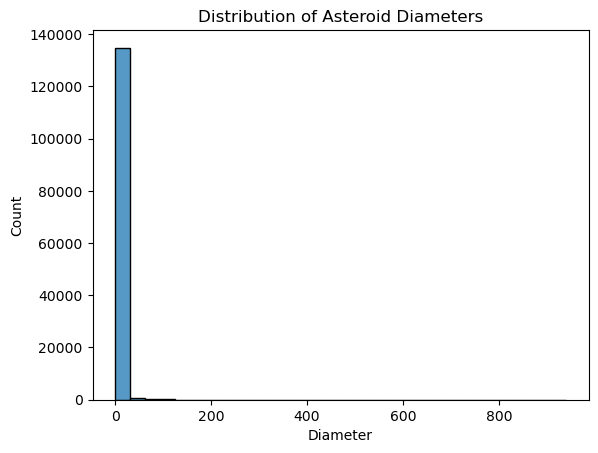

In [76]:
import seaborn as sns

sns.histplot(data['diameter'], bins=30)
plt.xlabel('Diameter')
plt.ylabel('Count')
plt.title('Distribution of Asteroid Diameters')
plt.show()

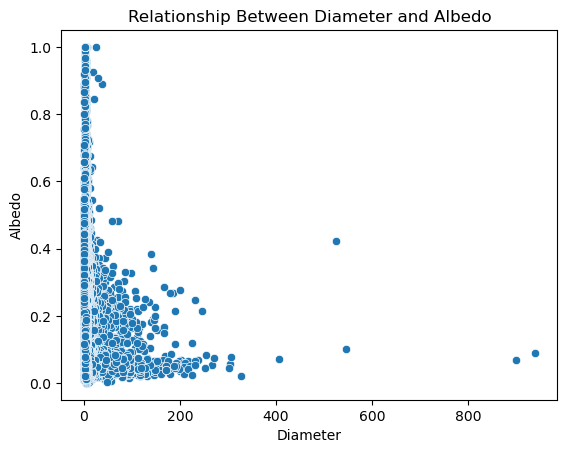

In [77]:
sns.scatterplot(x='diameter', y='albedo', data=data)
plt.xlabel('Diameter')
plt.ylabel('Albedo')
plt.title('Relationship Between Diameter and Albedo')
plt.show()

KEY OBSERVATIONS : 

Negative Correlation:
        
        There seems to be a general negative correlation between diameter and albedo.
        This suggests that as the diameter of an asteroid increases, its albedo (reflectivity) tends to decrease.

Clustering: 
        
        The data points cluster in a few specific regions. This might indicate different groups or categories of
        asteroids based on their diameter and albedo characteristics.

Outliers: 
        
        There are a few outliers with larger diameters and lower albedos. These could be interesting to investigate
        further as they might represent unique asteroid types or properties.
        

POSSIBLE INTERPRETATIONS : 

Composition: 

    Asteroids with larger diameters might have different compositions or surface features that result in lower albedos.

Formation Processes:

    Different formation processes or evolutionary pathways could lead to asteroids with varying sizes and reflective properties.

Age: 

    Older asteroids might have experienced more weathering and erosion, resulting in darker surfaces and lower albedos.

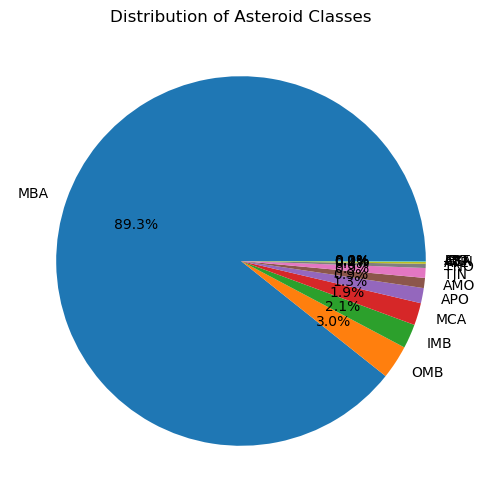

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.pie(data['class'].value_counts(), labels=data['class'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Asteroid Classes')
plt.show()

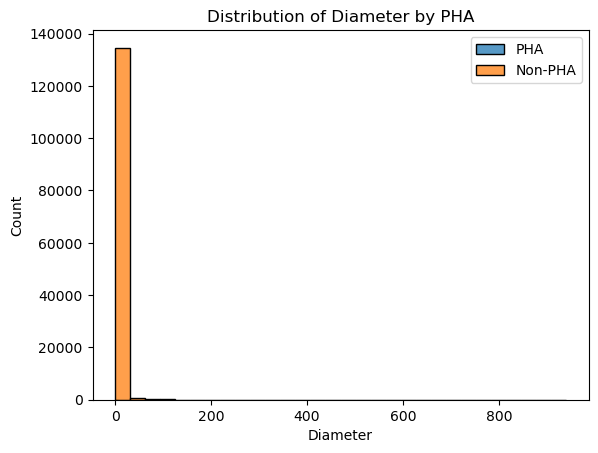

In [84]:
sns.histplot(data[data['pha'] == 'Y']['diameter'], bins=30, label='PHA')
sns.histplot(data[data['pha'] == 'N']['diameter'], bins=30, label='Non-PHA')
plt.xlabel('Diameter')
plt.ylabel('Count')
plt.title('Distribution of Diameter by PHA')
plt.legend()
plt.show()

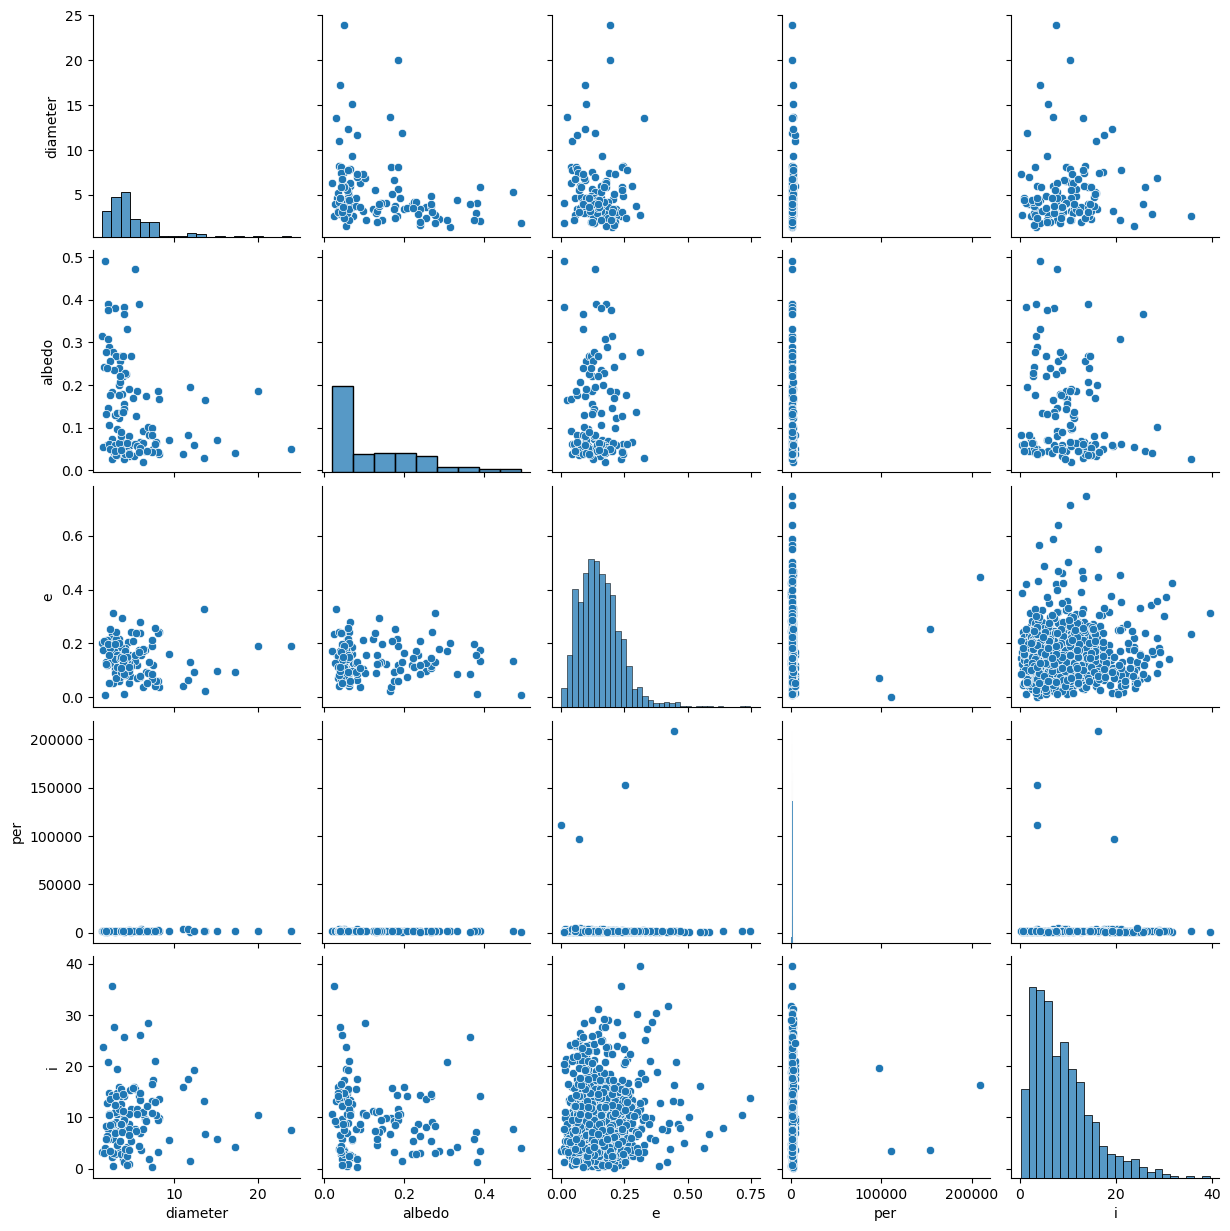

In [95]:
import seaborn as sns
import pandas as pd

# Sample a smaller subset of data (e.g., 1000 rows)
data_sample = data.sample(1000, random_state=42)  # Set random_state for reproducibility

# Create the pair plot
sns.pairplot(data_sample[['diameter', 'albedo', 'e', 'per', 'i']])
plt.show()

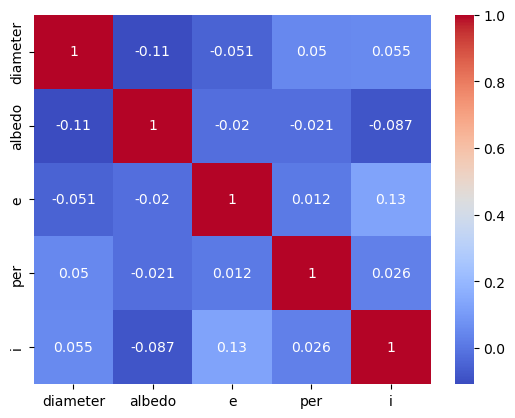

In [96]:
# Calculate correlation matrix
correlation_matrix = data[['diameter', 'albedo', 'e', 'per', 'i']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The provided correlation matrix shows the relationships between the following features: diameter, albedo, eccentricity (e), orbital period (per), and inclination (i). Here are some key observations:


Diameter and Albedo: There's a weak negative correlation between diameter and albedo. This suggests that larger asteroids tend to have slightly lower albedos.


Eccentricity and Orbital Period: There's a moderate positive correlation between eccentricity and orbital period. This indicates that asteroids with more eccentric orbits (more elongated) tend to have longer orbital periods.


Inclination and Other Features: Inclination (the angle of the orbit relative to the ecliptic plane) shows weak correlations with diameter, albedo, and eccentricity. This suggests that the inclination is relatively independent of these other orbital parameters.


Overall, the correlation matrix reveals that there are some moderate relationships between certain features, but no strong, dominant correlations. This might indicate that the asteroid data is relatively complex and not easily explained by simple linear relationships. Further analysis and exploration would be needed to uncover more nuanced relationships between these features and their impact on the target variable (potentially hazardous status).

In [93]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')